In [61]:
# Import libraries

import pandas as pd # Data prepprocessing
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import numpy as np
from collections import Counter # Counting

In [6]:
# Load the data set

df = pd.read_csv(r"/Users/olaoluwaajiboye/Documents/Data Analysis/10Alytics data analysis/Python/EDA training/Dune Sales Data.csv")


In [9]:
# Top 5 rows 

df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [10]:
# Last five rows

df.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Numerical Statistical Analysis

df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [13]:
#Dimensionality of the data - Numbers of rows and columns

df.shape

(34867, 12)

In [14]:
# Examine the columns/features of the data

df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [15]:
# Investigate the dataset for anomalies and data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [16]:
# Categorical Statistical Analysis

df.describe(include = ['object', 'bool'])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


Dealing with missing data
1. MCAR (Missing completely at random)
2. MAR (Missing at random)
3. MNAR (missing not at ransom)

In [19]:
# Investigate the missing data

null_vals = df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

<Axes: >

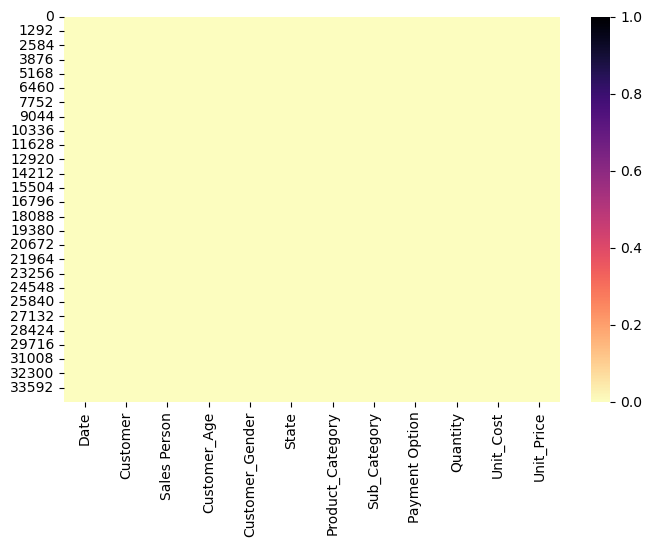

In [21]:
# Visualize the missing data

plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar = True, cmap = 'magma_r')

<Axes: >

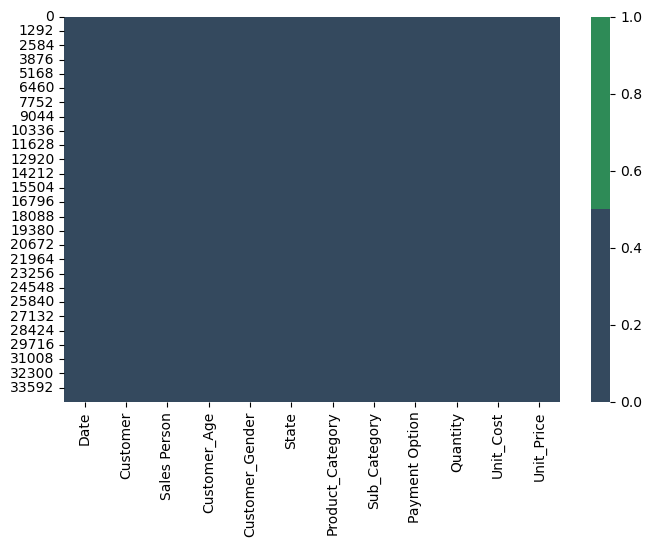

In [23]:
plt.figure(figsize=(8,5))

colours = ['#34495E', 'seagreen'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [24]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [25]:
import missingno as msno 

<Axes: >

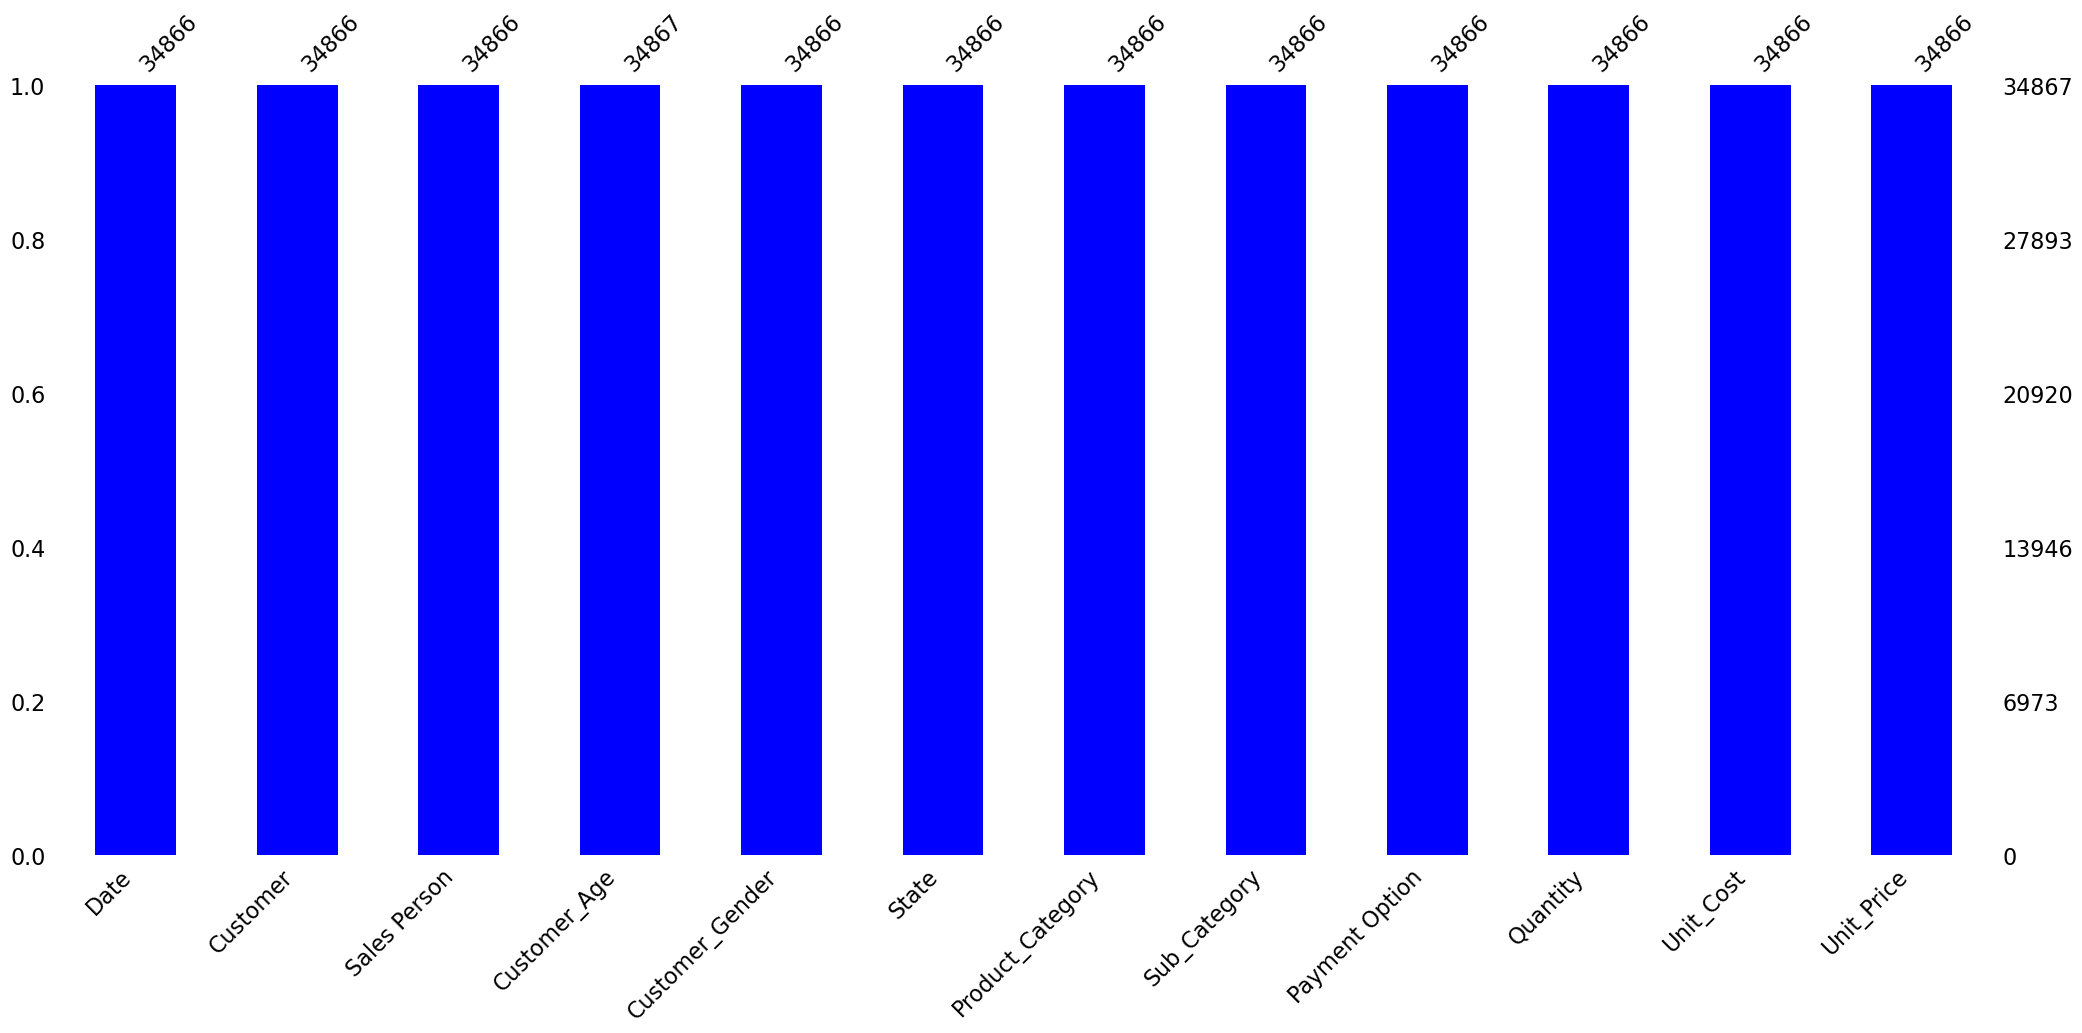

In [26]:
# Visualize missing values as a matrix 

msno.bar(df, color = "blue")

<Axes: >

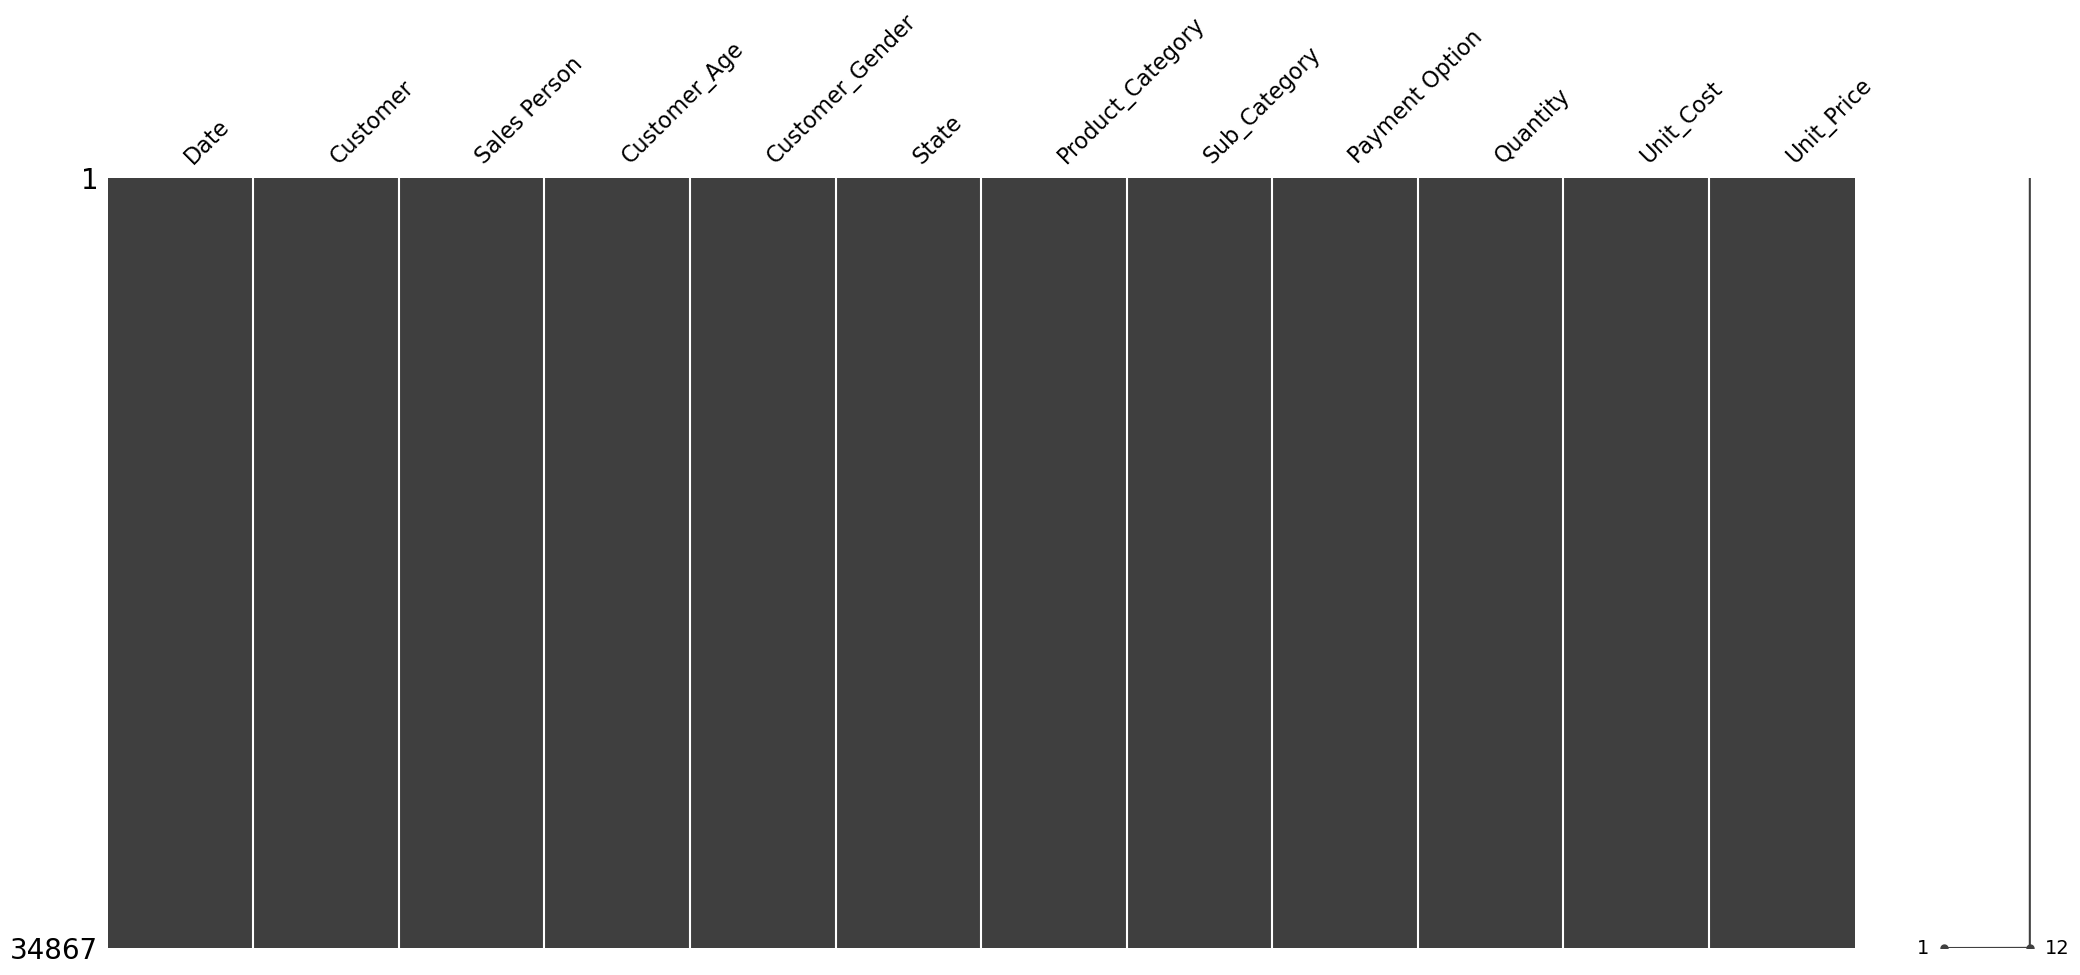

In [27]:
# Visualize missing values as a matrix 
msno.matrix(df) 

In [ ]:
# Display where the missing data exist in the data

In [29]:
df[df.isnull().any(axis = 1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Drop the missinf Data

df.dropna(inplace = True)

In [31]:
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [32]:
# Datetime Analysis

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5


In [35]:
# covert the date column into a panda datetime object

df["Date"] = pd.to_datetime(df["Date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


In [36]:
# Extract the year, Month, Quarter

df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["month_name"] = df["Date"].dt.month_name()
df["quarter"] = df["Date"].dt.quarter

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1


In [38]:
#  How to Group customer age

def age_group(x):
    if x <= 25:
        return "Young Adult"
    elif x <= 40:
        return "Adult"
    elif x<= 50:
        return "Old Adult"
    else:
        return "Elders"
    

# Apply function to the data
df['age_group'] = df['Customer_Age'].apply(age_group)
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,Adult


In [ ]:
# calculate cost, Revenue and profit

In [39]:
df["cost"] = df["Quantity"] * df["Unit_Cost"]
df["revenue"] = df["Quantity"] * df["Unit_Price"]
df["profit"] = df["revenue"] - df["cost"]

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,Adult,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,Adult,49.0,57.0,8.0


In [43]:
# profit/loss group

def prol(x):
    if x >= 0:
        return "Profit"
    else:
        return "Loss"

df["Profilt_label"] = df["profit"].apply(prol)
df.head(2)
        

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,Profilt_label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016,2,February,1,Adult,80.0,109.0,29.0,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016,2,February,1,Adult,49.0,57.0,8.0,Profit


Univariate Analysis
it involves analyzing the distribution and summary stattistics of individual Variables/colums/feature.

1. Numerical Column/Feture = Numerical Visualization Techniques
2. Categorical Column/Feature = Categorical Vizualization Techniques

<Axes: xlabel='Customer', ylabel='count'>

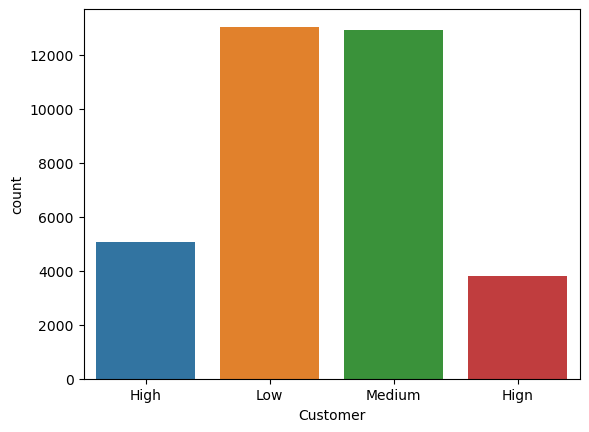

In [45]:
# How many customers belong to each customer category

sns.countplot(x = "Customer", data = df)

In [46]:
# Investigate the column affeted

df[df["Customer"] == 'Hign'].head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,Profilt_label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,Adult,2295.00,2136.00,-159.0,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,Adult,35.00,39.00,4.0,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,Adult,50.01,56.01,6.0,Profit


<Axes: xlabel='Customer', ylabel='count'>

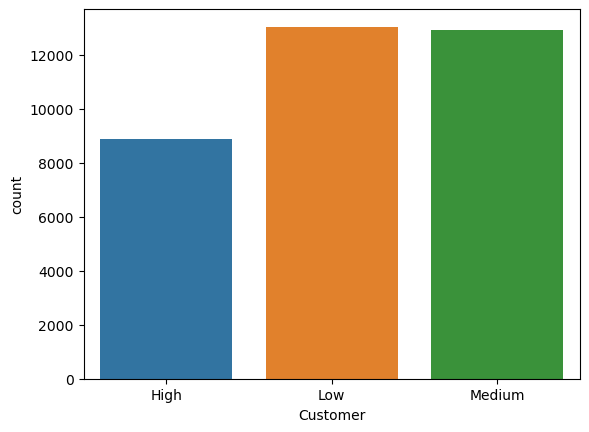

In [47]:
df.loc[df["Customer"] == 'Hign', "Customer"] = "High"

sns.countplot(x = "Customer", data = df)

In [49]:
df["Customer"].value_counts()

Low       13041
Medium    12926
High       8899
Name: Customer, dtype: int64

Narration about finding

<Axes: xlabel='Sales Person', ylabel='count'>

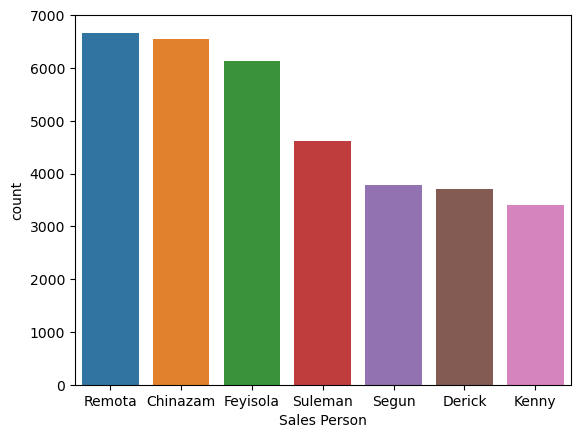

In [56]:
# Sales Person - How Many transaction by sales person

ax = sns.countplot(x = df["Sales Person"], order = df["Sales Person"].value_counts(ascending = False).index)
ax

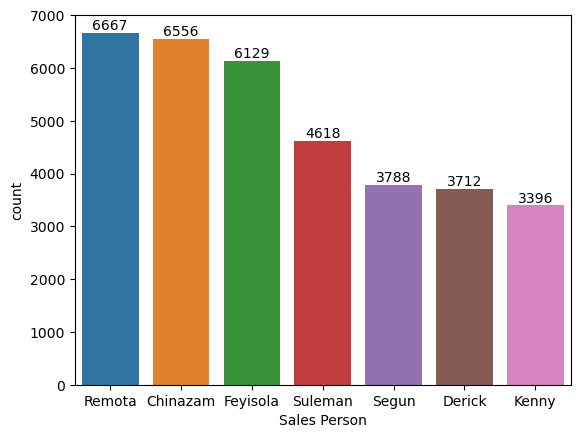

In [57]:
# How to input values to the bar graphy

ax = sns.countplot(x = df["Sales Person"], order = df["Sales Person"].value_counts(ascending = False).index)
values = df["Sales Person"].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);

### Narration about observation

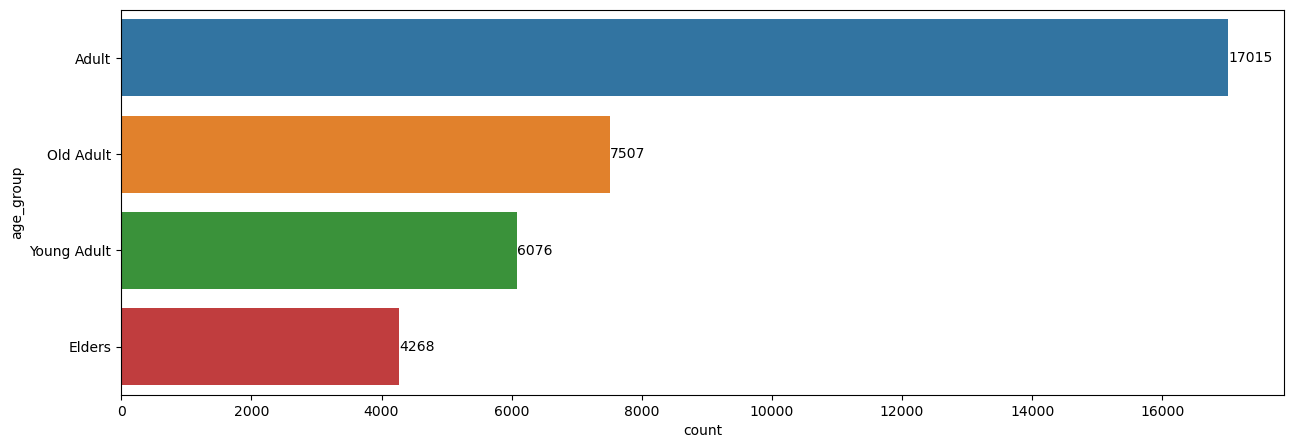

In [59]:
# Total Transaction by customer Age group
plt.figure(figsize = (15,5))

ax = sns.countplot(y = df["age_group"], order = df["age_group"].value_counts(ascending = False).index)
values = df["age_group"].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);

### Narration about observation

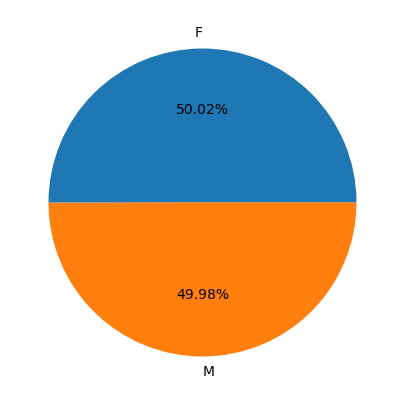

In [64]:
# Total Transaction by Customer Gender

fig,ax = plt.subplots(figsize = (5,5))

count = Counter(df["Customer_Gender"])
ax.pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
plt.show();

### Narration about observation

<Axes: xlabel='State', ylabel='count'>

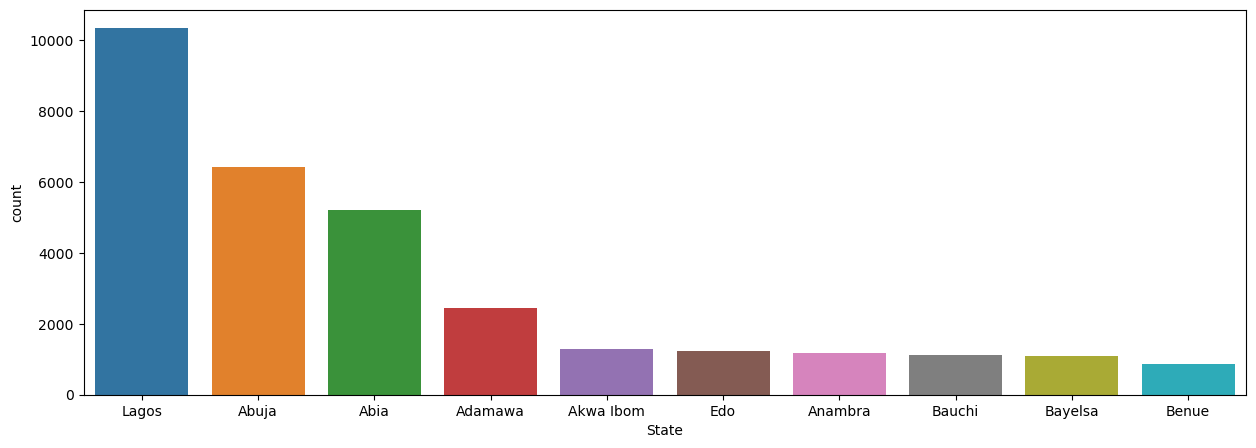

In [69]:
# Total top ten Transaction by state
plt.figure(figsize = (15,5))
topten = df["State"].value_counts().head(10)
sns.countplot(x = "State", data = df, order = topten.index)

In [44]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'Profilt_label'],
      dtype='object')

In [ ]:
# Total transaction by profilt or loss

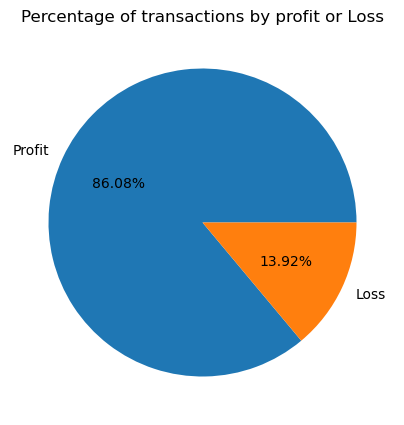

In [70]:
fig,ax = plt.subplots(figsize = (5,5))

count = Counter(df["Profilt_label"])
ax.pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by profit or Loss")
plt.show();

### Numerical Data Visualization

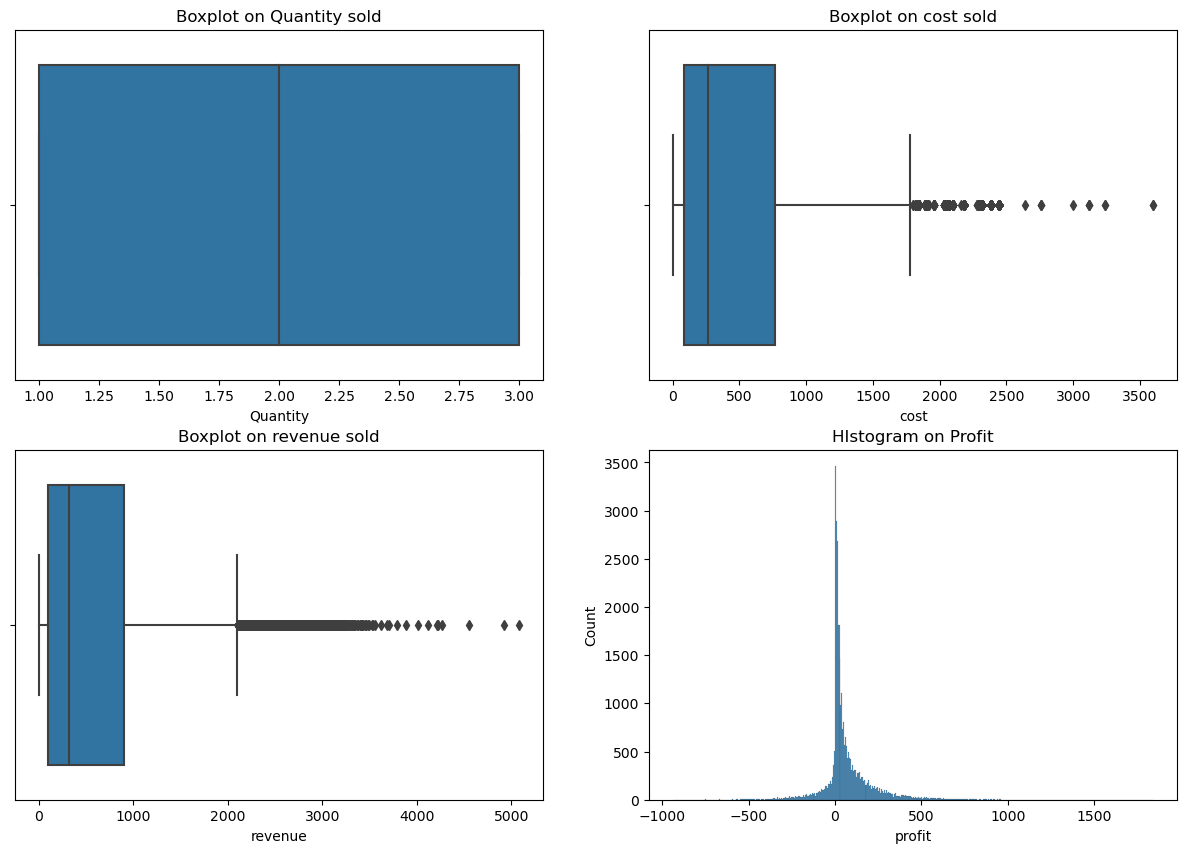

In [77]:
# Quantity, Cost, Revenue and Profit - Subplot

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(15,10))

sns.boxplot(x="Quantity", data = df, ax = axs[0,0])
axs[0,0].set_title("Boxplot on Quantity sold")

sns.boxplot(x="cost", data = df, ax = axs[0,1])
axs[0,1].set_title("Boxplot on cost sold")

sns.boxplot(x="revenue", data = df, ax = axs[1,0])
axs[1,0].set_title("Boxplot on revenue sold")

sns.histplot(x="profit", data = df, ax = axs[1,1])
axs[1,1].set_title("HIstogram on Profit");

### Bivariate Analysis
it incolves analyzing the relationship between two Variables
focus on profit

In [81]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'Profilt_label'],
      dtype='object')

''

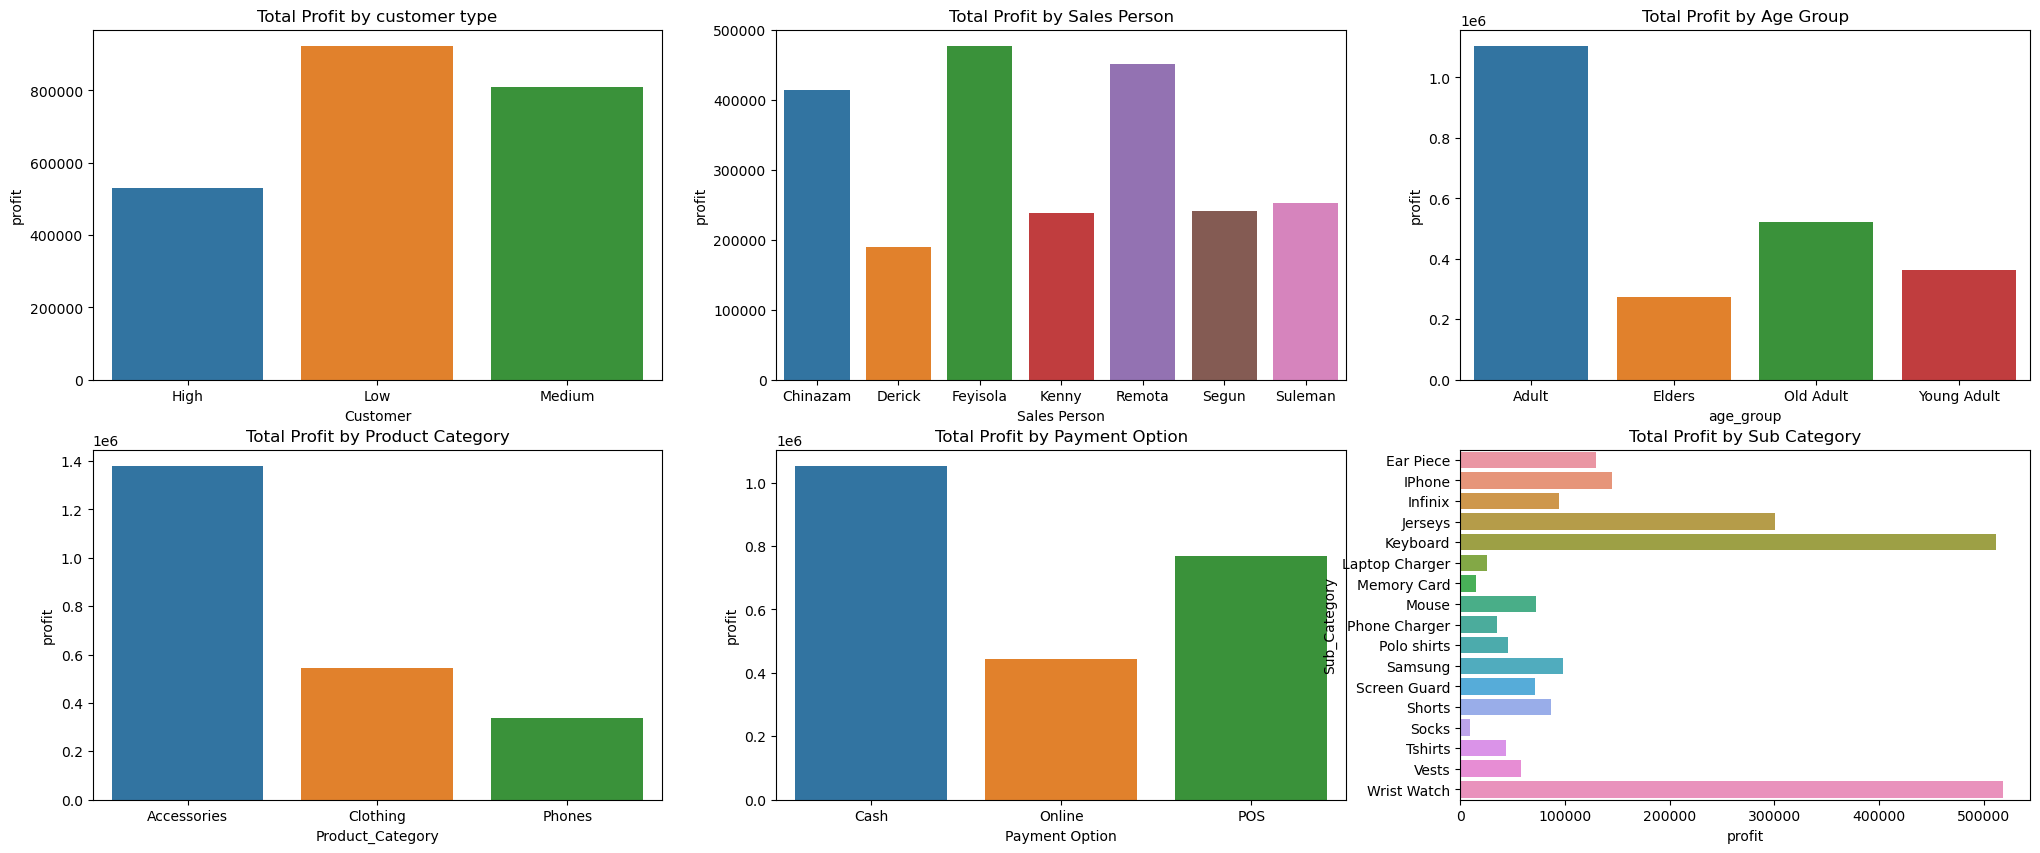

In [87]:
# categorical columns


fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(25,10))

cust_prof = df.groupby("Customer")["profit"].sum().reset_index()
sns.barplot(x = "Customer", data = cust_prof, y = "profit", ax = axs[0,0])
axs[0,0].set_title("Total Profit by customer type")

sp_prof = df.groupby("Sales Person")["profit"].sum().reset_index()
sns.barplot(x = "Sales Person", data = sp_prof, y = "profit", ax = axs[0,1])
axs[0,1].set_title("Total Profit by Sales Person")

age_prof = df.groupby("age_group")["profit"].sum().reset_index()
sns.barplot(x = "age_group", data = age_prof, y = "profit", ax = axs[0,2])
axs[0,2].set_title("Total Profit by Age Group")

pc_prof = df.groupby("Product_Category")["profit"].sum().reset_index()
sns.barplot(x = "Product_Category", data = pc_prof, y = "profit", ax = axs[1,0])
axs[1,0].set_title("Total Profit by Product Category")

po_prof = df.groupby("Payment Option")["profit"].sum().reset_index()
sns.barplot(x = "Payment Option", data = po_prof, y = "profit", ax = axs[1,1])
axs[1,1].set_title("Total Profit by Payment Option")

sc_prof = df.groupby("Sub_Category")["profit"].sum().reset_index()
sns.barplot(y = "Sub_Category", data = sc_prof, x = "profit", ax = axs[1,2])
axs[1,2].set_title("Total Profit by Sub Category")

;

In [ ]:
# Numerical column

''

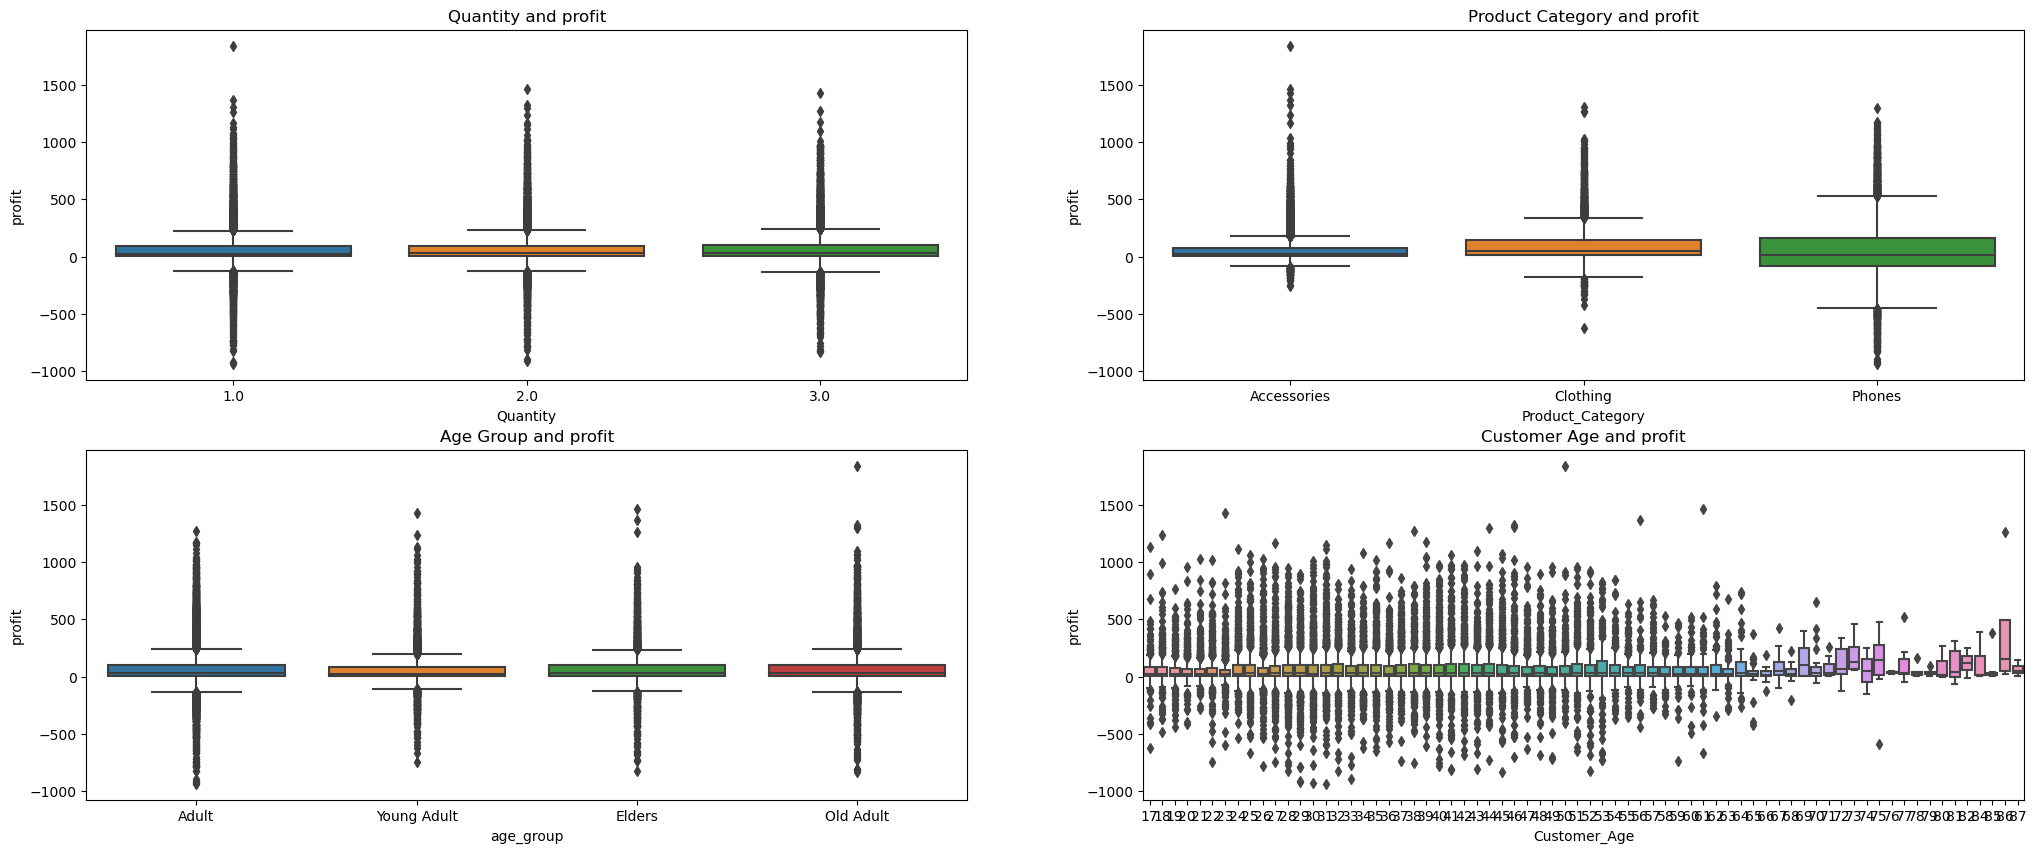

In [93]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(25,10))

sns.boxplot(x = "Quantity", y ="profit", data = df, ax = axs[0,0])
axs[0,0].set_title("Quantity and profit")

sns.boxplot(x = "Product_Category", y ="profit", data = df, ax = axs[0,1])
axs[0,1].set_title("Product Category and profit")

sns.boxplot(x = "age_group", y ="profit", data = df, ax = axs[1,0])
axs[1,0].set_title("Age Group and profit")

sns.boxplot(x = "Customer_Age", y ="profit", data = df, ax = axs[1,1])
axs[1,1].set_title("Customer Age and profit")
;

### Multivariate Analysis
It incolves analyzing the replationship btw 3 or more variables

In [94]:
# Product category against cost, Revenue and profit

df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'Profilt_label'],
      dtype='object')

In [96]:
procat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()
procat

,Product_Category,cost,revenue,profit
0,Accessories,6041896.06,7420663.12,1378767.06
1,Clothing,2892324.94,3437556.95,545232.01
2,Phones,11148745.02,11486354.63,337609.61


In [97]:
procat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()
procat = pd.melt(procat, id_vars = "Product_Category", var_name = "Metric", value_name = "Total")
procat

,Product_Category,Metric,Total
0,Accessories,cost,6041896.06
1,Clothing,cost,2892324.94
2,Phones,cost,11148745.02
3,Accessories,revenue,7420663.12
4,Clothing,revenue,3437556.95
5,Phones,revenue,11486354.63
6,Accessories,profit,1378767.06
7,Clothing,profit,545232.01
8,Phones,profit,337609.61


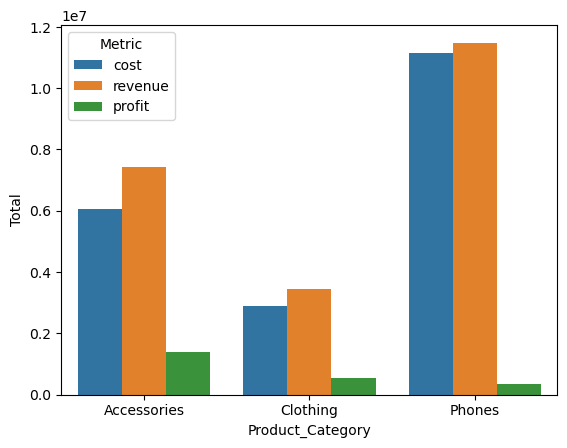

In [100]:
procat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()
procat = pd.melt(procat, id_vars = "Product_Category", var_name = "Metric", value_name = "Total")
sns.barplot(data = procat, x = "Product_Category", y = "Total", hue = "Metric")
plt.show()

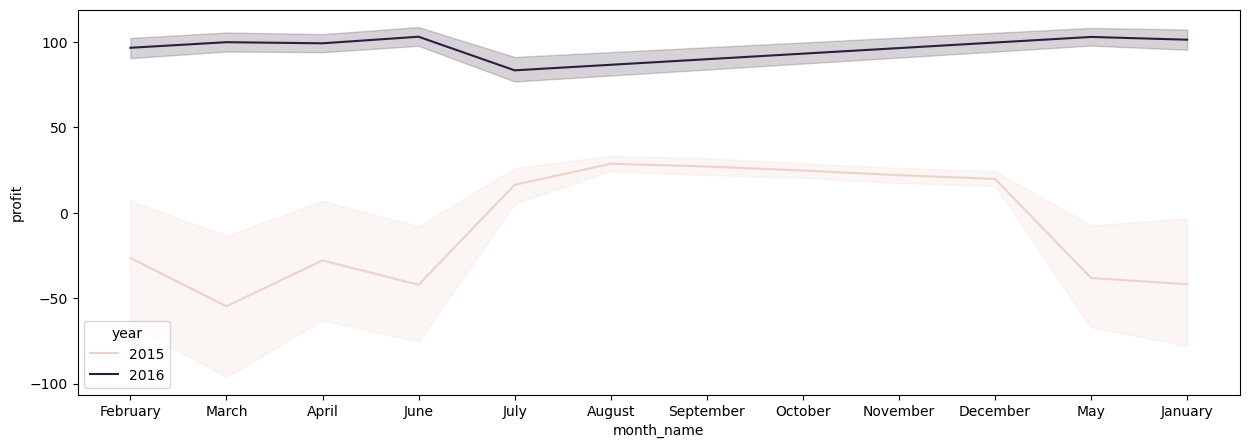

In [102]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month_name', y='profit', data = df, hue='year');

In [103]:
# Using Pivot table in python

df.pivot_table(values = 'profit', index = 'year', columns = 'month', aggfunc = 'sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


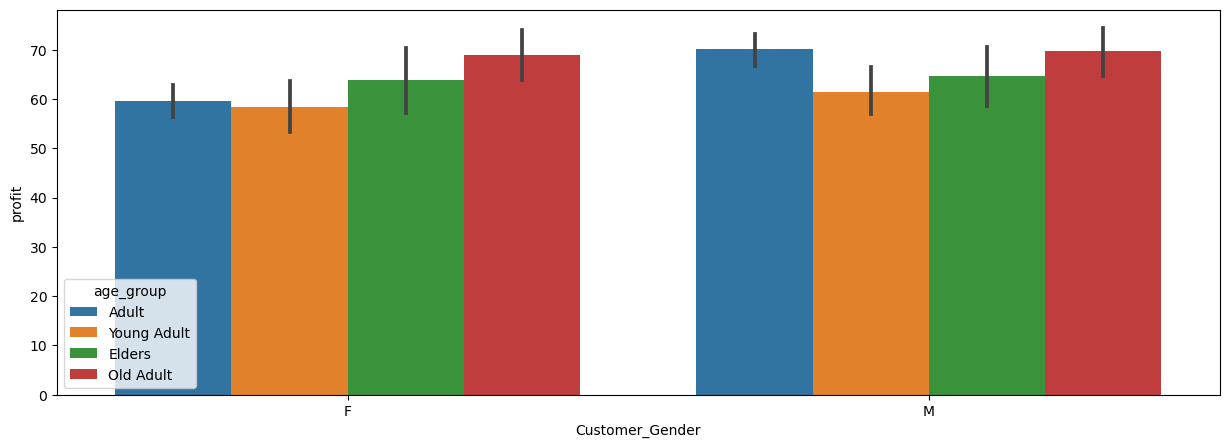

In [105]:
plt.figure(figsize = (15,5))
sns.barplot(x="Customer_Gender", y = "profit", data = df, hue = "age_group");

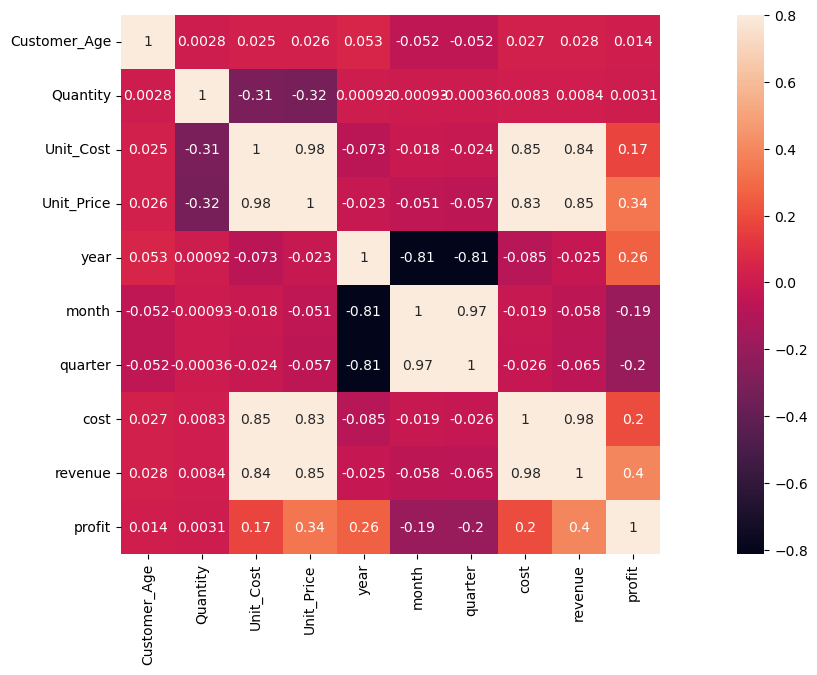

In [109]:
# correlation


plt.figure(figsize = (20,7))
sns.heatmap(a, vmax = .8, square = True, annot = True);

In [110]:
import warnings
warnings.filterwarnings("ignore")

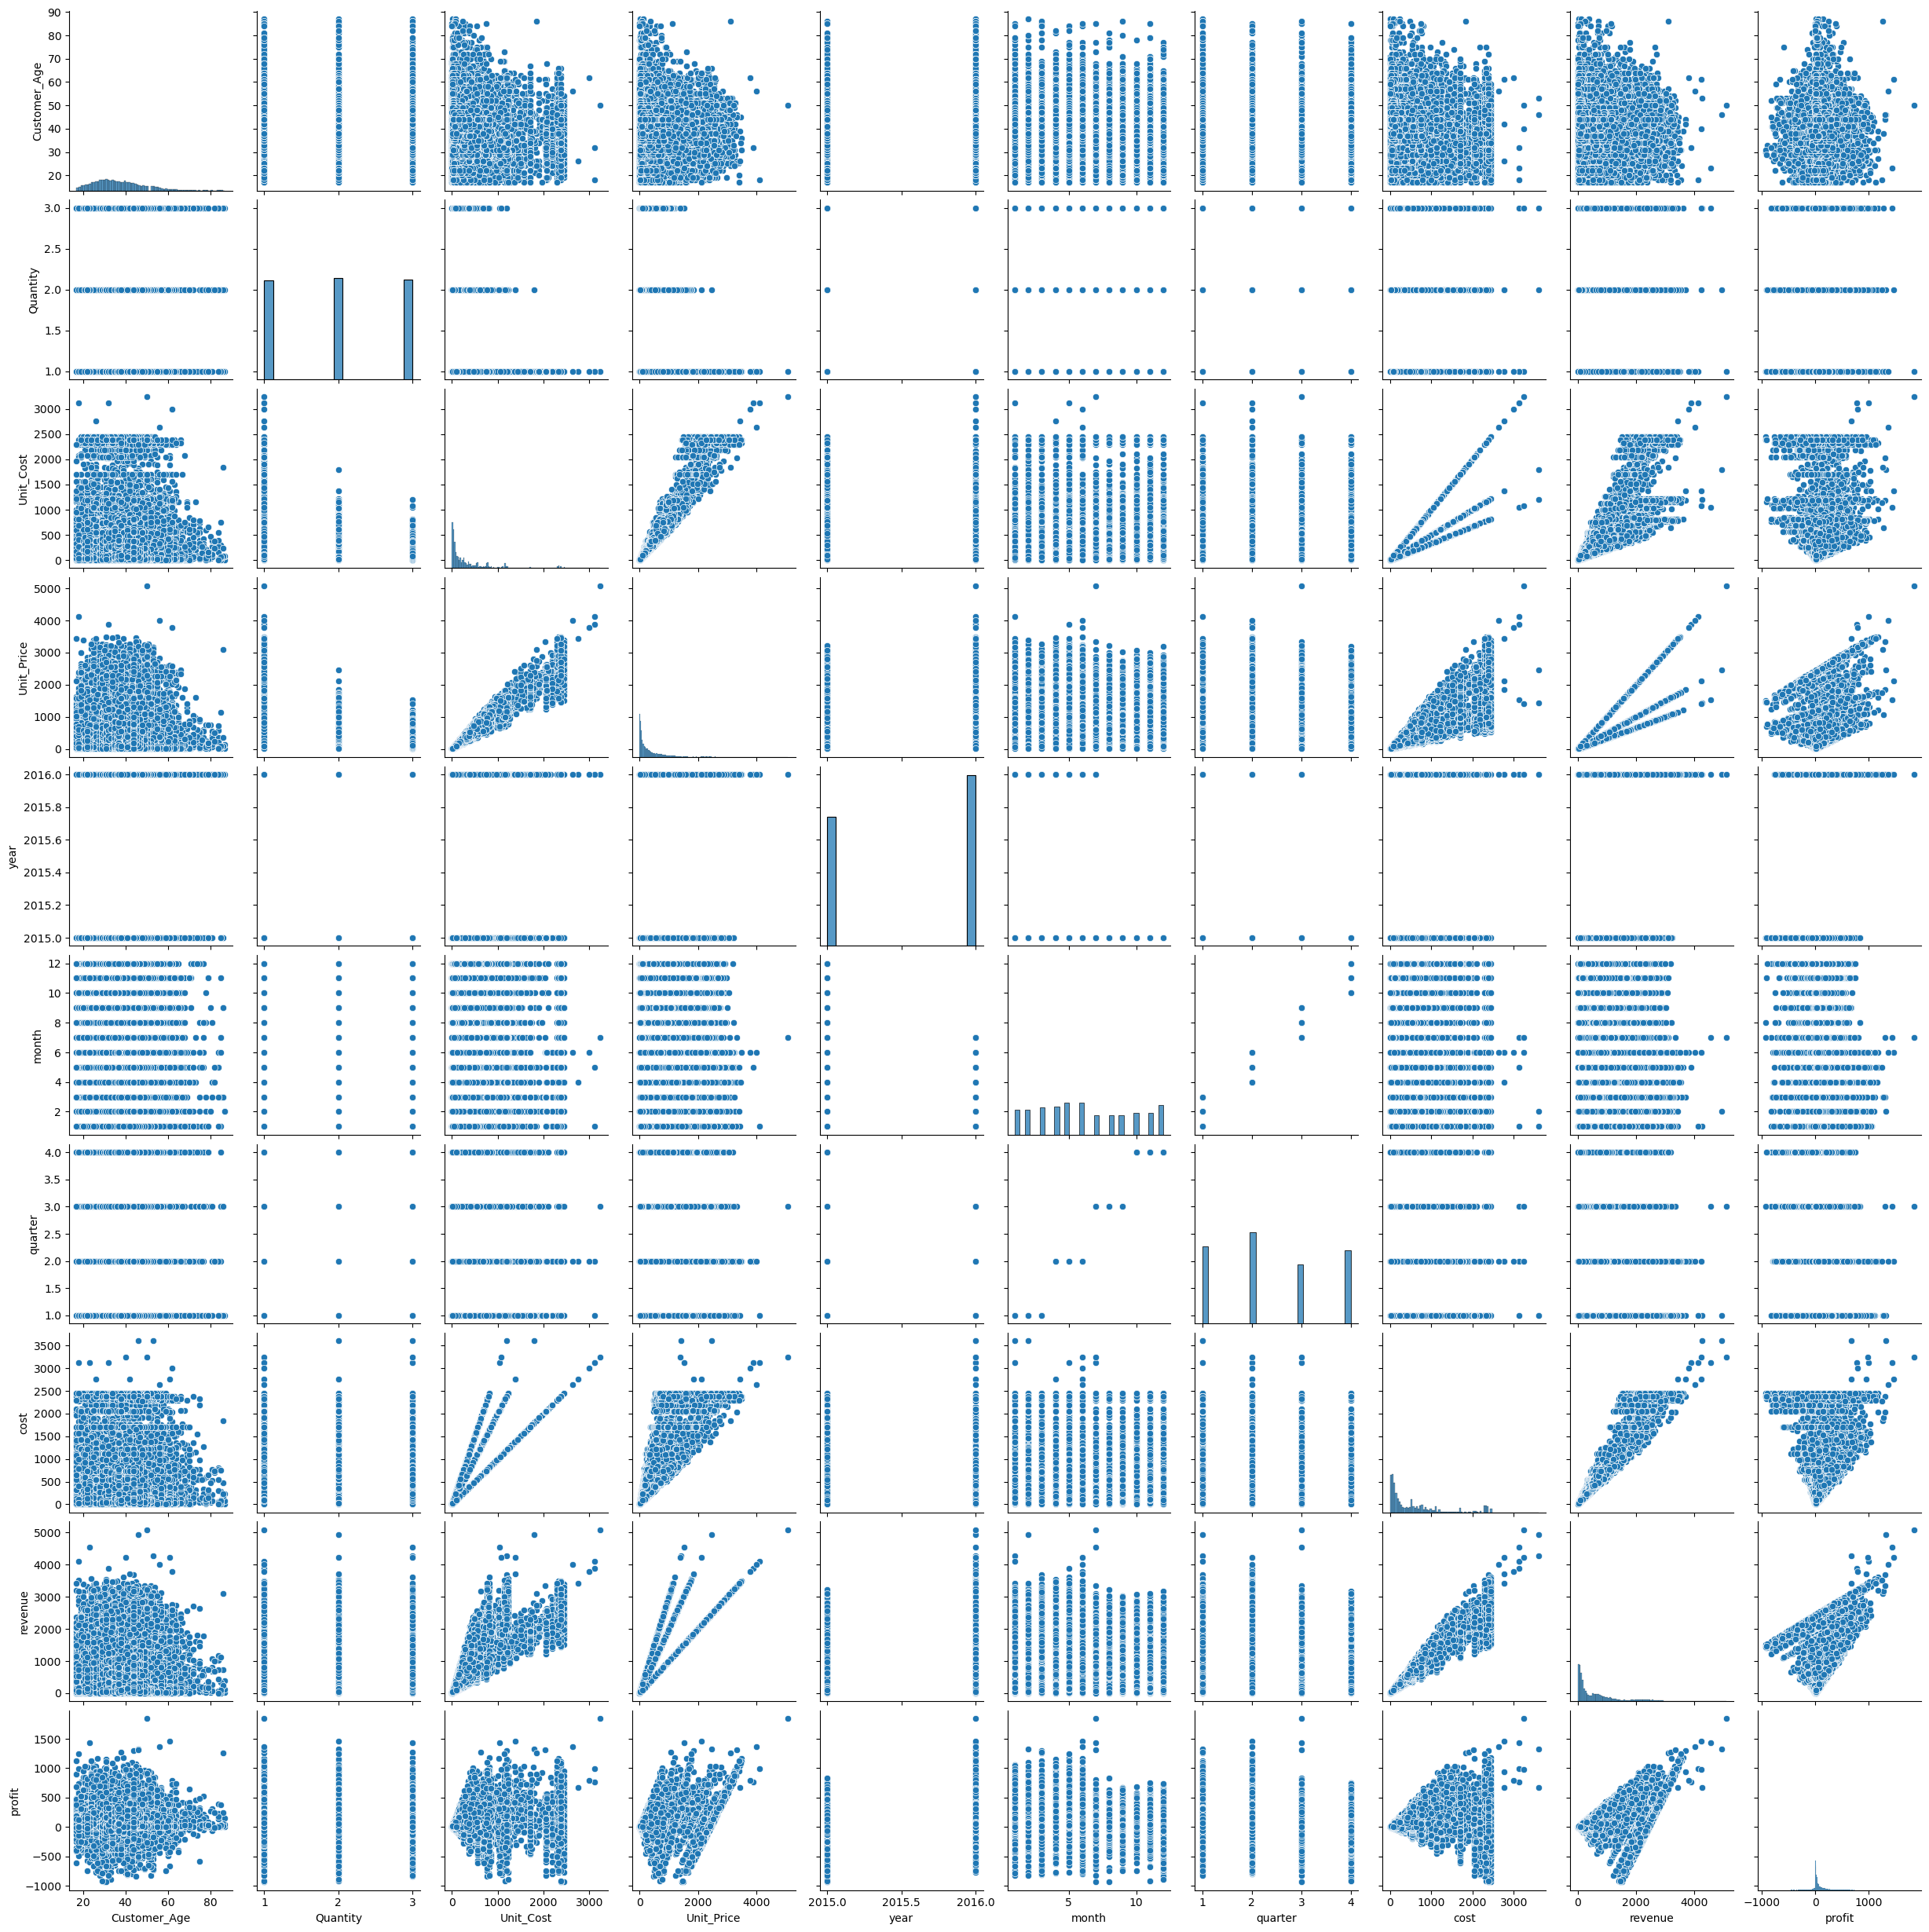

In [111]:
sns.pairplot(df, size = 2.5)